In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset/Dataset2Use_Assignment1.xlsx')
df.head()
#df_shape = df.shape

# Display the shape
#print("Number of rows:", df_shape[0])
#print("Number of columns:", df_shape[1])

,365* ( Β.Υ / Κοστ.Πωλ ),Λειτ.Αποτ/Συν.Ενεργ. (ROA),ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ,ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ : (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ,(ΑΠΑΙΤ.*365) / ΠΩΛ.,Συν.Υποχρ/Συν.Ενεργ,Διάρκεια Παραμονής Αποθεμάτων,Λογαριθμος Προσωπικού,ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ,ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ,ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ,ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1),ΕΤΟΣ
0,1014.128862,0.011751,0.038505,0.965479,567.866550,0.532258,545.195964,0.301030,0,1,0,1,2006
1,561.974631,0.099662,0.015775,1.415467,335.917481,0.660556,7.950910,1.176091,1,1,1,1,2006
2,826.919025,0.009594,0.093562,1.575034,350.618086,0.550912,28.602221,1.204120,0,1,1,1,2006
3,493.176956,0.196284,0.000581,1.346780,414.508709,0.683717,1.216888,1.431364,0,0,0,1,2006
4,100.421465,0.179038,0.000173,3.299687,118.548381,0.254496,52.346321,1.518514,0,1,1,1,2006


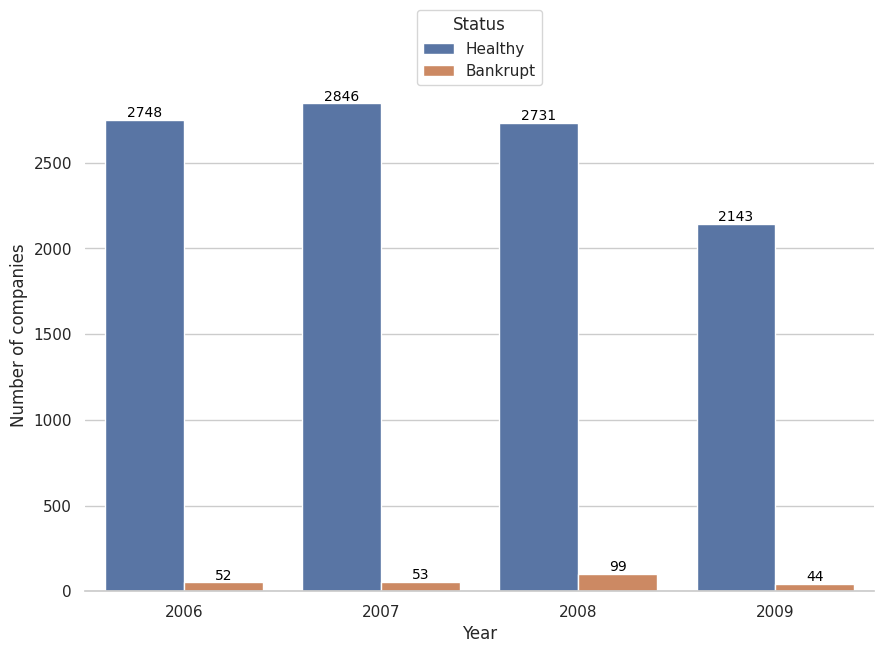

In [4]:
# Count the occurrences of each combination of Category1 and Category2
count_data = df.groupby(['ΕΤΟΣ', 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)']).size().reset_index(name='ΑΡΙΘΜΟΣ ΕΤΑΙΡΕΙΩΝ')

# Define a mapping from codes to labels
mapping = {1: 'Healthy', 2: 'Βankrupt'}

# Use the map function to replace values in the 'binary_variable' column
count_data['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] = count_data['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'].map(mapping)

# Create a grouped bar plot
sns.set(style="whitegrid")
g = sns.catplot(x='ΕΤΟΣ', y='ΑΡΙΘΜΟΣ ΕΤΑΙΡΕΙΩΝ', hue='ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)', data=count_data, kind='bar', legend_out=False, height=6, aspect=1.5)
g.despine(left=True)
#g.set(title='Αριθμός υγιών και χρεωκοπημένων επιχειρήσεων, για κάθε έτος (2006-2009).')
#g.legend.set_title("Status")
plt.legend(title="Status", bbox_to_anchor=(0.5, 1.15), loc='upper center')
g.set_axis_labels("Year", "Number of companies")
# Add text labels above the bars
ax = g.facet_axis(0, 0)  # Get the axis of the first subplot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.0f}',
            fontsize=10, color='black', ha='center', va='bottom')


plt.show()

<ipython-input-6-c9e72b6c4501>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')


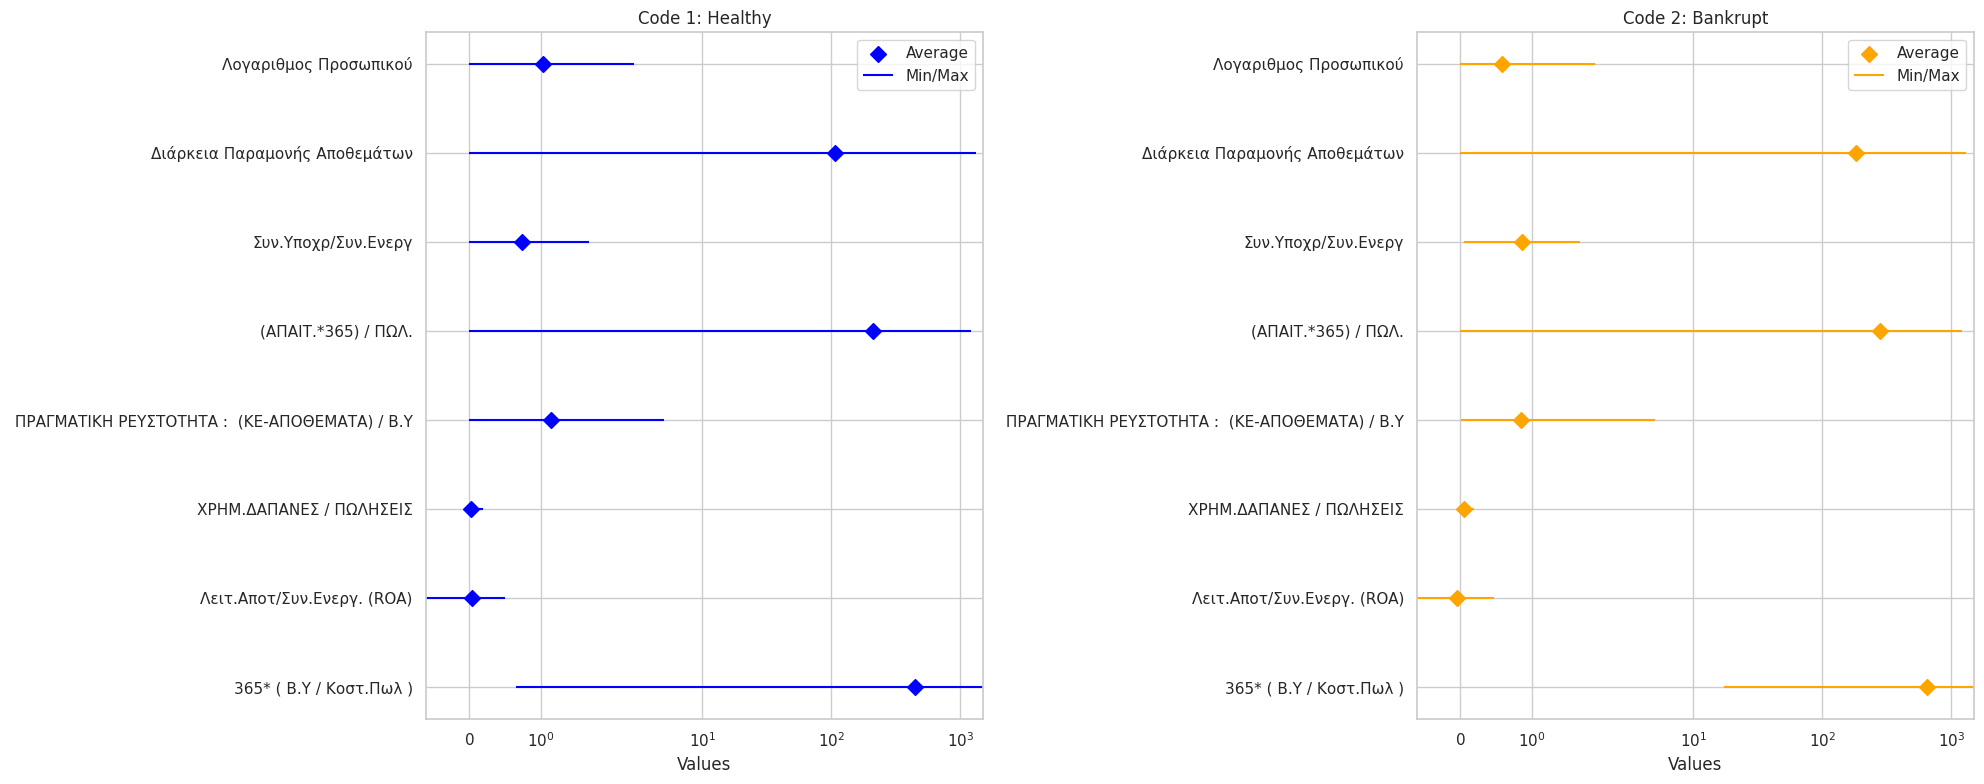

In [6]:
# Filter rows with code 1 and 2 and
# Remove the binary variables and the variable with the name 'ΕΤΟΣ'

df_code1 = df[df['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 1].drop(columns=['ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ', 'ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ',
       'ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ', 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)', 'ΕΤΟΣ'])
df_code2 = df[df['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 2].drop(columns=['ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ', 'ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ',
       'ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ', 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)', 'ΕΤΟΣ'])

# Calculate average, min, and max values for each group
avg_code1 = df_code1.mean()
min_code1 = df_code1.min()
max_code1 = df_code1.max()

avg_code2 = df_code2.mean()
min_code2 = df_code2.min()
max_code2 = df_code2.max()


# Create two subplots with log scale on the x-axis and shared x-axis limits
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), sharex=True)

# Plot for Code 1
axes[0].scatter(avg_code1, avg_code1.index, color='blue', label='Average', marker='D', s=65)
axes[0].hlines(avg_code1.index, min_code1, max_code1, color='blue', linestyle='-', label='Min/Max')
axes[0].set_xscale('symlog')  # Set symmetrical log scale on the x-axis
axes[0].set_title('Code 1: Healthy')
axes[0].legend()

# Plot for Code 2
axes[1].scatter(avg_code2, avg_code2.index, color='orange', label='Average', marker='D', s=65)
axes[1].hlines(avg_code2.index, min_code2, max_code2, color='orange', linestyle='-', label='Min/Max')
axes[1].set_xscale('symlog')  # Set symmetrical log scale on the x-axis
axes[1].set_title('Code 2: Bankrupt')
axes[1].legend()

# Set common labels and show the plots
for ax in axes:
    ax.set_xlabel('Values')
    # Adjust the symmetrical log scale limits based on your data
    ax.set_xlim(min([min_code1.min(), min_code2.min()]), max([max_code1.max(), max_code2.max()]))
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')

plt.tight_layout()
plt.show()


In [7]:
df_continuous = df.drop(columns=['ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ', 'ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ',
       'ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ', 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)', 'ΕΤΟΣ'])

df_continuous.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
365* ( Β.Υ / Κοστ.Πωλ ),10716.0,446.399496,386.634236,0.654350,173.160013,325.365223,570.802351,1500.000000
Λειτ.Αποτ/Συν.Ενεργ. (ROA),10716.0,0.037484,0.126532,-0.600000,0.004531,0.028217,0.080520,0.500000
ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ,10716.0,0.028929,0.038007,0.000000,0.002010,0.015143,0.041418,0.200000
ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ : (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ,10716.0,1.142252,0.871149,0.000661,0.718023,0.936360,1.230170,5.000000
(ΑΠΑΙΤ.*365) / ΠΩΛ.,10716.0,213.448023,216.243734,0.000000,82.219330,158.379806,266.363253,1200.000000
Συν.Υποχρ/Συν.Ενεργ,10716.0,0.744075,0.305659,0.000412,0.568051,0.772479,0.902387,1.670000
Διάρκεια Παραμονής Αποθεμάτων,10716.0,108.843018,168.460819,0.000000,23.780926,57.983227,122.548356,1332.105492
Λογαριθμος Προσωπικού,10716.0,1.020948,0.557128,0.000000,0.698970,1.041393,1.361728,2.929930


In [8]:
# Check for NaN values
nan_report = df.isna().sum()

# Calculate the percentage of NaN values
nan_percentage_report = (df.isna().mean() * 100).round(2)

# Concatenate the reports side by side
combined_report = pd.concat([nan_report, nan_percentage_report], axis=1, keys=['NaN Count', 'NaN Percentage'])

# Display the combined report
print("Combined NaN Report:")
print(combined_report)

# Provide a relative message to the user
if combined_report.values.max() == 0:
    print("\nGood news! There are no missing values in the DataFrame.")
else:
    print("\nPlease be aware that there are missing values in the DataFrame. Consider handling them appropriately.")


Combined NaN Report:
                                                NaN Count  NaN Percentage
365* ( Β.Υ / Κοστ.Πωλ )                                 0             0.0
Λειτ.Αποτ/Συν.Ενεργ. (ROA)                              0             0.0
ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ                                 0             0.0
 ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ          0             0.0
(ΑΠΑΙΤ.*365) / ΠΩΛ.                                     0             0.0
Συν.Υποχρ/Συν.Ενεργ                                     0             0.0
Διάρκεια Παραμονής Αποθεμάτων                           0             0.0
Λογαριθμος Προσωπικού                                   0             0.0
ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ                                        0             0.0
ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ                                       0             0.0
ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ                                  0             0.0
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)                           0             0.0
ΕΤΟΣ             

In [9]:
from sklearn.preprocessing import minmax_scale

# Normalize the features (0 to 10) using minmax_scale
df_normalized = pd.DataFrame(minmax_scale(df.iloc[:, 0:11], feature_range=(0, 1), axis=0), columns=[f'X{i}' for i in range(1, 12)])

# Add the target variable with index 11 to the normalized data and recoded as 0 and 1
df_normalized[df.columns[11]] = df[df.columns[11]].replace({1: 0, 2: 1})

# Display the final DataFrame
print("Final DataFrame:")
print(df_normalized)


Final DataFrame:
             X1        X2        X3        X4        X5        X6        X7  \
0      0.675945  0.556137  0.192526  0.192989  0.473222  0.318549  0.409274   
1      0.374377  0.636057  0.078877  0.282999  0.279931  0.395393  0.005969   
2      0.551084  0.554176  0.467810  0.314916  0.292182  0.329722  0.021471   
3      0.328492  0.723895  0.002904  0.269259  0.345424  0.409265  0.000914   
4      0.066540  0.708216  0.000866  0.659892  0.098790  0.152183  0.039296   
...         ...       ...       ...       ...       ...       ...       ...   
10711  0.085982  0.587406  0.000000  0.251984  0.000317  0.435056  0.001295   
10712  0.741716  0.575118  0.671309  0.132778  0.001099  0.689205  0.009293   
10713  0.796078  0.388794  1.000000  0.114471  0.001561  0.617131  0.317038   
10714  1.000000  0.478406  1.000000  0.143064  0.013465  0.598837  0.968495   
10715  1.000000  0.498077  1.000000  0.214483  0.028909  0.532656  0.878023   

             X8   X9  X10  X11  ΕΝ


Fold 1:
Train Set 8037 samples- χρεωκοπημένες: 186, υγιείς εταιρείες: 7851
         X1        X2        X3        X4        X5        X6        X7  \
0  0.675945  0.556137  0.192526  0.192989  0.473222  0.318549  0.409274   
1  0.374377  0.636057  0.078877  0.282999  0.279931  0.395393  0.005969   
3  0.328492  0.723895  0.002904  0.269259  0.345424  0.409265  0.000914   
4  0.066540  0.708216  0.000866  0.659892  0.098790  0.152183  0.039296   
5  0.272356  0.553526  0.321293  0.123581  0.143522  0.406080  0.059460   

         X8   X9  X10  X11  ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)  
0  0.102743  0.0  1.0  0.0                              0  
1  0.401406  1.0  1.0  1.0                              0  
3  0.488532  0.0  0.0  0.0                              0  
4  0.518277  0.0  1.0  1.0                              0  
5  0.380195  0.0  1.0  0.0                              0  
Test Set 2679 samples - χρεωκοπημένες: 62, υγιείς εταιρείες: 2617
          X1        X2        X3        X4     

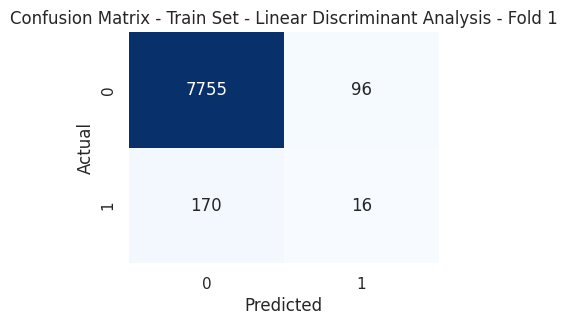

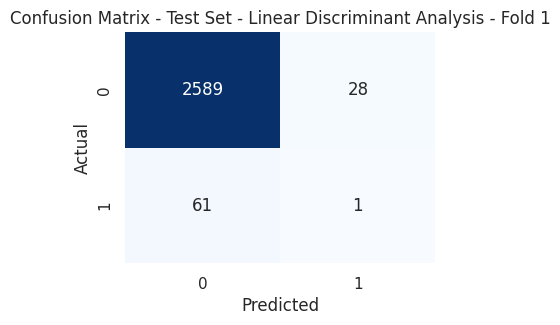

  Model: Linear Discriminant Analysis
    Train Set Metrics:
      Accuracy: 0.9669
      Precision: 0.1429
      Recall: 0.0860
      F1 Score: 0.1074
      AUC-ROC: 0.5369
    Test Set Metrics:
      Accuracy: 0.9668
      Precision: 0.0345
      Recall: 0.0161
      F1 Score: 0.0220
      AUC-ROC: 0.5027


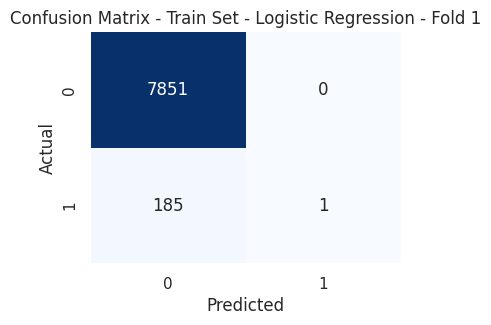

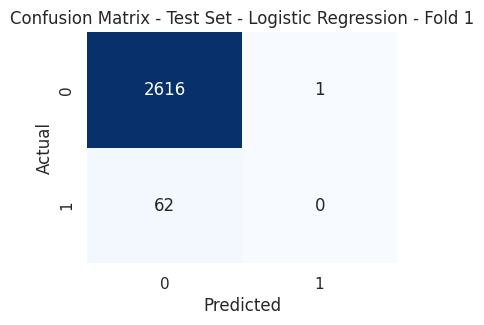

  Model: Logistic Regression
    Train Set Metrics:
      Accuracy: 0.9770
      Precision: 1.0000
      Recall: 0.0054
      F1 Score: 0.0107
      AUC-ROC: 0.5027
    Test Set Metrics:
      Accuracy: 0.9765
      Precision: 0.0000
      Recall: 0.0000
      F1 Score: 0.0000
      AUC-ROC: 0.4998


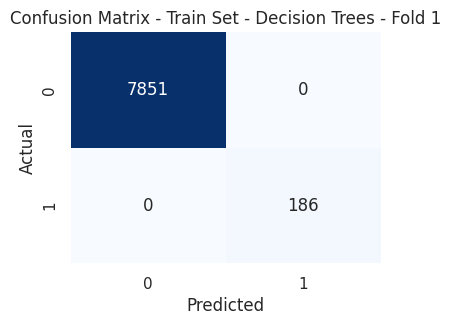

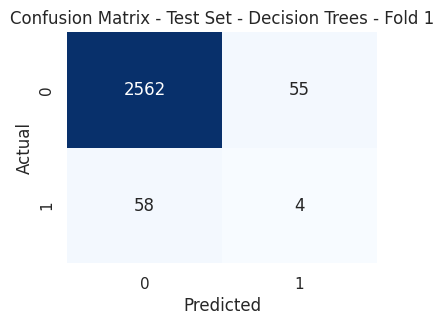

  Model: Decision Trees
    Train Set Metrics:
      Accuracy: 1.0000
      Precision: 1.0000
      Recall: 1.0000
      F1 Score: 1.0000
      AUC-ROC: 1.0000
    Test Set Metrics:
      Accuracy: 0.9578
      Precision: 0.0678
      Recall: 0.0645
      F1 Score: 0.0661
      AUC-ROC: 0.5217


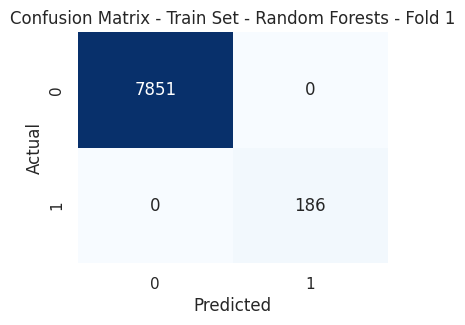

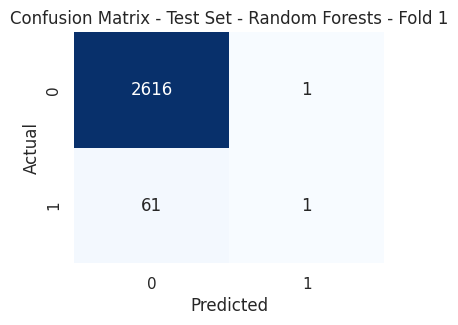

  Model: Random Forests
    Train Set Metrics:
      Accuracy: 1.0000
      Precision: 1.0000
      Recall: 1.0000
      F1 Score: 1.0000
      AUC-ROC: 1.0000
    Test Set Metrics:
      Accuracy: 0.9769
      Precision: 0.5000
      Recall: 0.0161
      F1 Score: 0.0312
      AUC-ROC: 0.5079


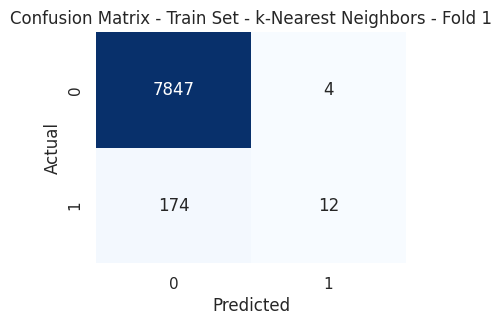

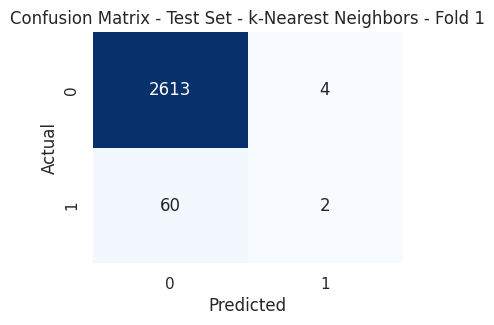

  Model: k-Nearest Neighbors
    Train Set Metrics:
      Accuracy: 0.9779
      Precision: 0.7500
      Recall: 0.0645
      F1 Score: 0.1188
      AUC-ROC: 0.5320
    Test Set Metrics:
      Accuracy: 0.9761
      Precision: 0.3333
      Recall: 0.0323
      F1 Score: 0.0588
      AUC-ROC: 0.5154


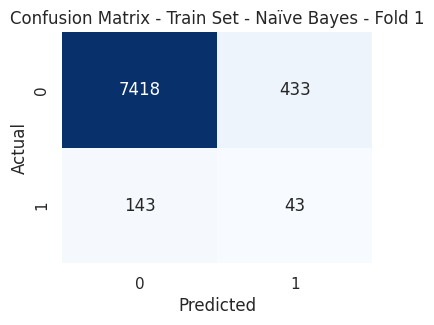

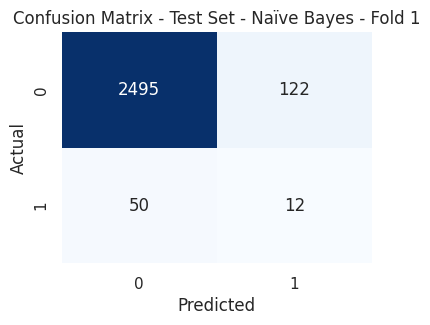

  Model: Naïve Bayes
    Train Set Metrics:
      Accuracy: 0.9283
      Precision: 0.0903
      Recall: 0.2312
      F1 Score: 0.1299
      AUC-ROC: 0.5880
    Test Set Metrics:
      Accuracy: 0.9358
      Precision: 0.0896
      Recall: 0.1935
      F1 Score: 0.1224
      AUC-ROC: 0.5735


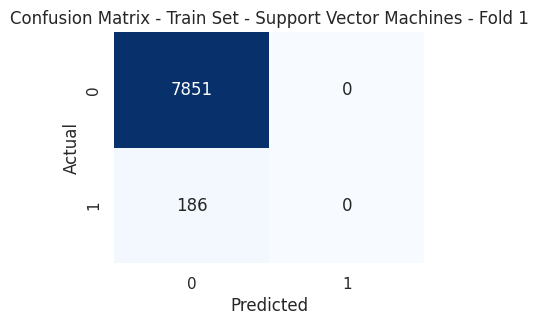

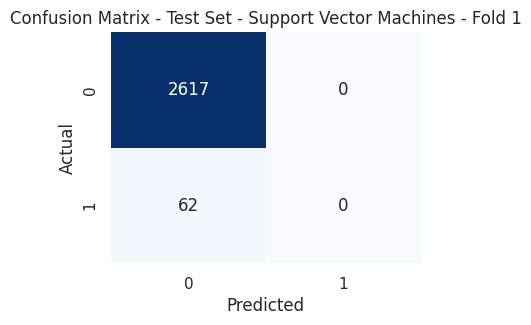

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Model: Support Vector Machines
    Train Set Metrics:
      Accuracy: 0.9769
      Precision: 0.0000
      Recall: 0.0000
      F1 Score: 0.0000
      AUC-ROC: 0.5000
    Test Set Metrics:
      Accuracy: 0.9769
      Precision: 0.0000
      Recall: 0.0000
      F1 Score: 0.0000
      AUC-ROC: 0.5000


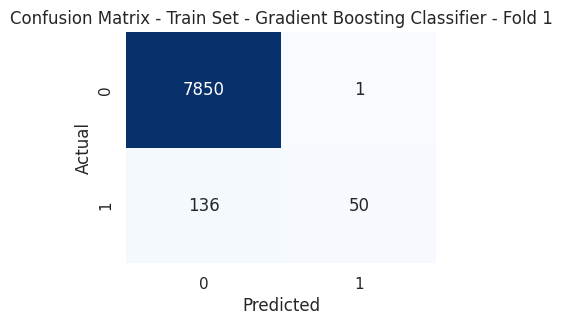

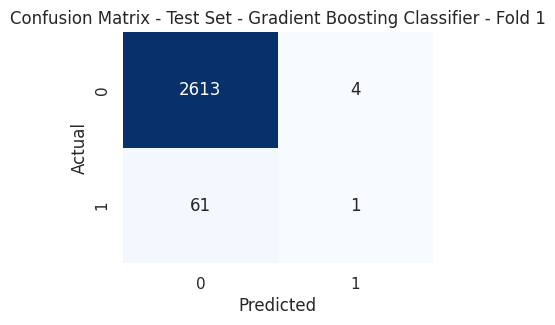

  Model: Gradient Boosting Classifier
    Train Set Metrics:
      Accuracy: 0.9830
      Precision: 0.9804
      Recall: 0.2688
      F1 Score: 0.4219
      AUC-ROC: 0.6343
    Test Set Metrics:
      Accuracy: 0.9757
      Precision: 0.2000
      Recall: 0.0161
      F1 Score: 0.0299
      AUC-ROC: 0.5073

Fold 2:
Train Set 8037 samples- χρεωκοπημένες: 186, υγιείς εταιρείες: 7851
         X1        X2        X3        X4        X5        X6        X7  \
0  0.675945  0.556137  0.192526  0.192989  0.473222  0.318549  0.409274   
1  0.374377  0.636057  0.078877  0.282999  0.279931  0.395393  0.005969   
2  0.551084  0.554176  0.467810  0.314916  0.292182  0.329722  0.021471   
3  0.328492  0.723895  0.002904  0.269259  0.345424  0.409265  0.000914   
5  0.272356  0.553526  0.321293  0.123581  0.143522  0.406080  0.059460   

         X8   X9  X10  X11  ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)  
0  0.102743  0.0  1.0  0.0                              0  
1  0.401406  1.0  1.0  1.0                  

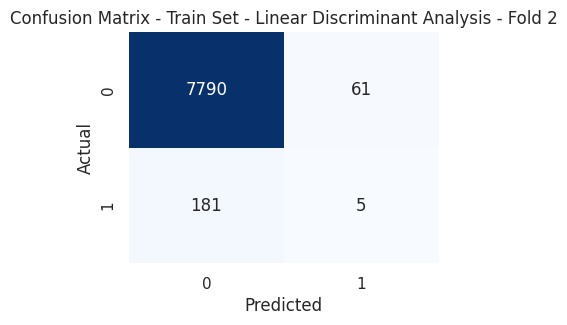

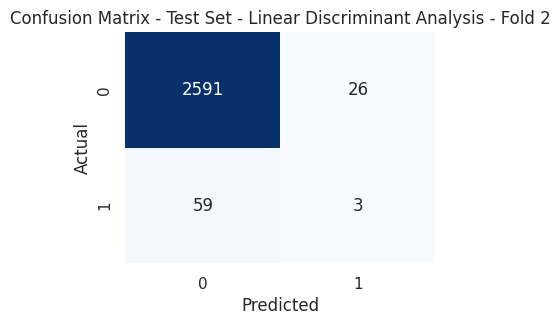

  Model: Linear Discriminant Analysis
    Train Set Metrics:
      Accuracy: 0.9699
      Precision: 0.0758
      Recall: 0.0269
      F1 Score: 0.0397
      AUC-ROC: 0.5096
    Test Set Metrics:
      Accuracy: 0.9683
      Precision: 0.1034
      Recall: 0.0484
      F1 Score: 0.0659
      AUC-ROC: 0.5192


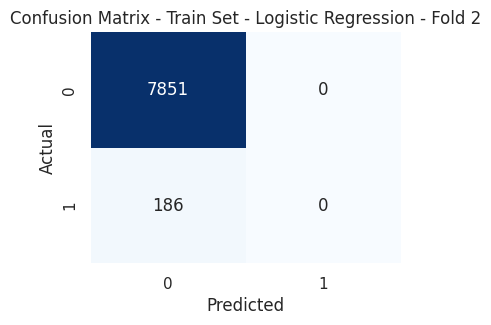

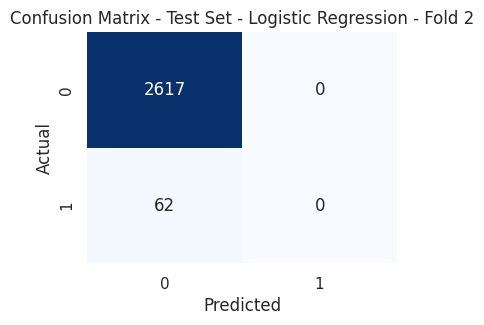

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Model: Logistic Regression
    Train Set Metrics:
      Accuracy: 0.9769
      Precision: 0.0000
      Recall: 0.0000
      F1 Score: 0.0000
      AUC-ROC: 0.5000
    Test Set Metrics:
      Accuracy: 0.9769
      Precision: 0.0000
      Recall: 0.0000
      F1 Score: 0.0000
      AUC-ROC: 0.5000


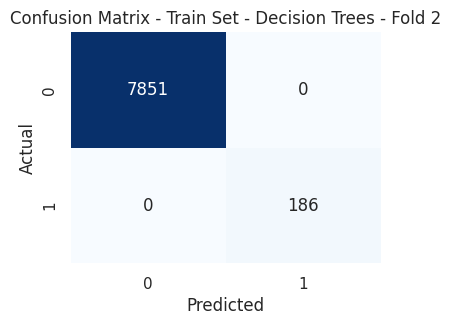

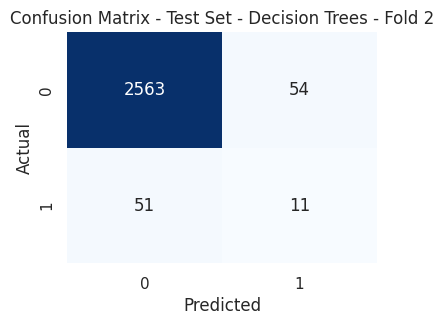

  Model: Decision Trees
    Train Set Metrics:
      Accuracy: 1.0000
      Precision: 1.0000
      Recall: 1.0000
      F1 Score: 1.0000
      AUC-ROC: 1.0000
    Test Set Metrics:
      Accuracy: 0.9608
      Precision: 0.1692
      Recall: 0.1774
      F1 Score: 0.1732
      AUC-ROC: 0.5784


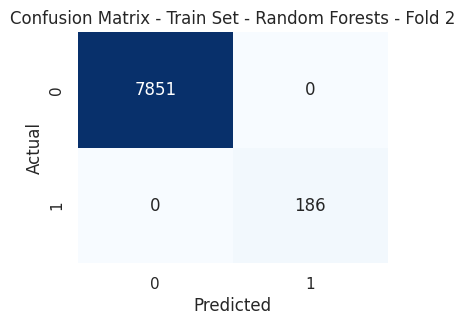

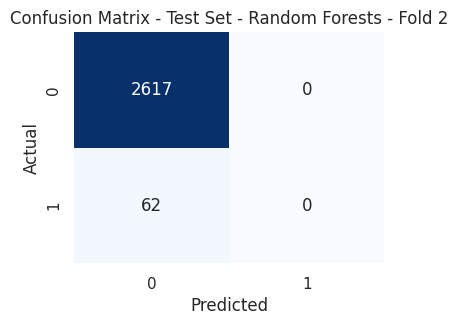

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Model: Random Forests
    Train Set Metrics:
      Accuracy: 1.0000
      Precision: 1.0000
      Recall: 1.0000
      F1 Score: 1.0000
      AUC-ROC: 1.0000
    Test Set Metrics:
      Accuracy: 0.9769
      Precision: 0.0000
      Recall: 0.0000
      F1 Score: 0.0000
      AUC-ROC: 0.5000


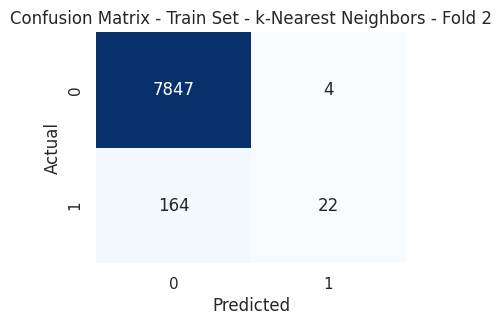

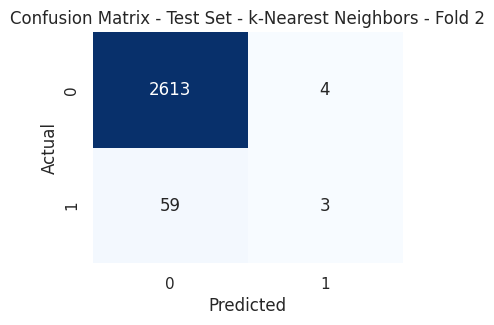

  Model: k-Nearest Neighbors
    Train Set Metrics:
      Accuracy: 0.9791
      Precision: 0.8462
      Recall: 0.1183
      F1 Score: 0.2075
      AUC-ROC: 0.5589
    Test Set Metrics:
      Accuracy: 0.9765
      Precision: 0.4286
      Recall: 0.0484
      F1 Score: 0.0870
      AUC-ROC: 0.5234


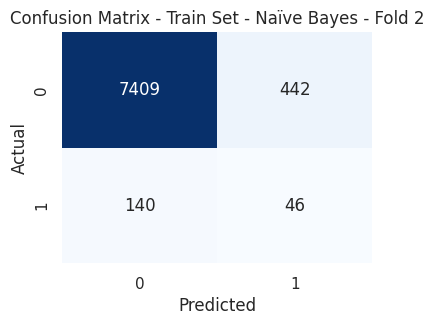

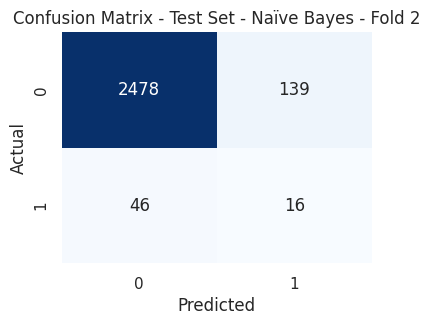

  Model: Naïve Bayes
    Train Set Metrics:
      Accuracy: 0.9276
      Precision: 0.0943
      Recall: 0.2473
      F1 Score: 0.1365
      AUC-ROC: 0.5955
    Test Set Metrics:
      Accuracy: 0.9309
      Precision: 0.1032
      Recall: 0.2581
      F1 Score: 0.1475
      AUC-ROC: 0.6025


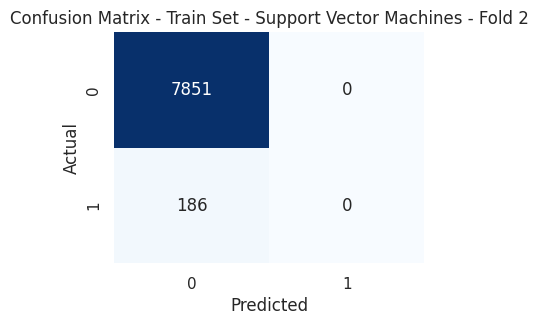

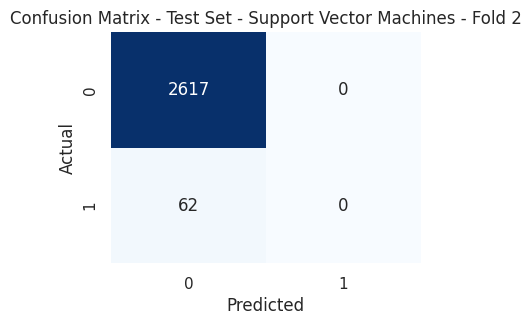

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Model: Support Vector Machines
    Train Set Metrics:
      Accuracy: 0.9769
      Precision: 0.0000
      Recall: 0.0000
      F1 Score: 0.0000
      AUC-ROC: 0.5000
    Test Set Metrics:
      Accuracy: 0.9769
      Precision: 0.0000
      Recall: 0.0000
      F1 Score: 0.0000
      AUC-ROC: 0.5000


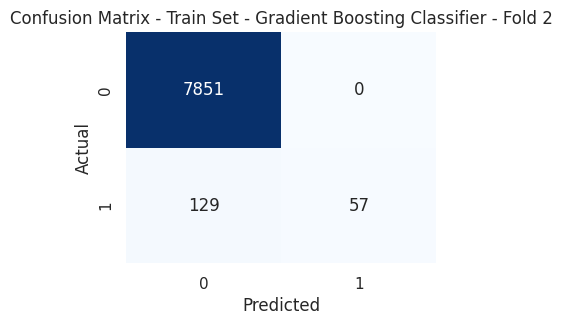

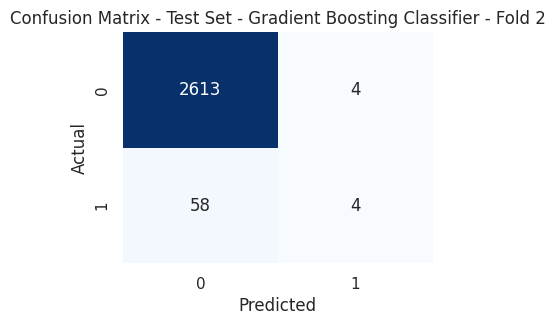

  Model: Gradient Boosting Classifier
    Train Set Metrics:
      Accuracy: 0.9839
      Precision: 1.0000
      Recall: 0.3065
      F1 Score: 0.4691
      AUC-ROC: 0.6532
    Test Set Metrics:
      Accuracy: 0.9769
      Precision: 0.5000
      Recall: 0.0645
      F1 Score: 0.1143
      AUC-ROC: 0.5315

Fold 3:
Train Set 8037 samples- χρεωκοπημένες: 186, υγιείς εταιρείες: 7851
         X1        X2        X3        X4        X5        X6        X7  \
2  0.551084  0.554176  0.467810  0.314916  0.292182  0.329722  0.021471   
4  0.066540  0.708216  0.000866  0.659892  0.098790  0.152183  0.039296   
5  0.272356  0.553526  0.321293  0.123581  0.143522  0.406080  0.059460   
7  0.548293  0.574081  0.036948  0.114799  0.105847  0.494200  0.059721   
8  0.102073  0.560406  0.006247  0.149692  0.068771  0.555338  0.012210   

         X8   X9  X10  X11  ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)  
2  0.410972  0.0  1.0  1.0                              0  
4  0.518277  0.0  1.0  1.0                  

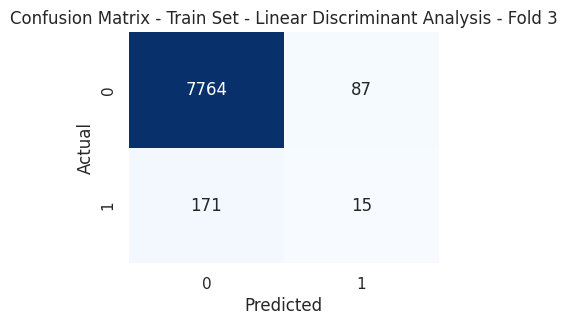

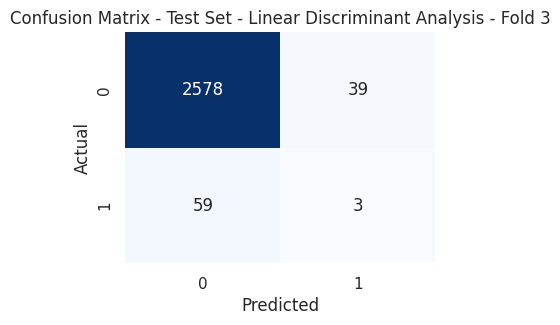

  Model: Linear Discriminant Analysis
    Train Set Metrics:
      Accuracy: 0.9679
      Precision: 0.1471
      Recall: 0.0806
      F1 Score: 0.1042
      AUC-ROC: 0.5348
    Test Set Metrics:
      Accuracy: 0.9634
      Precision: 0.0714
      Recall: 0.0484
      F1 Score: 0.0577
      AUC-ROC: 0.5167


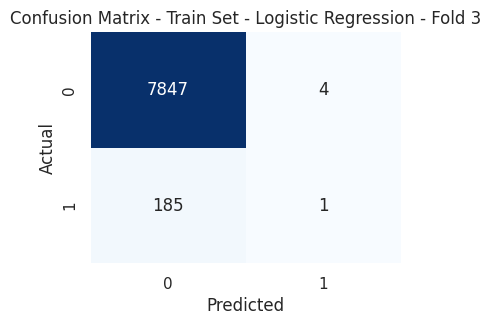

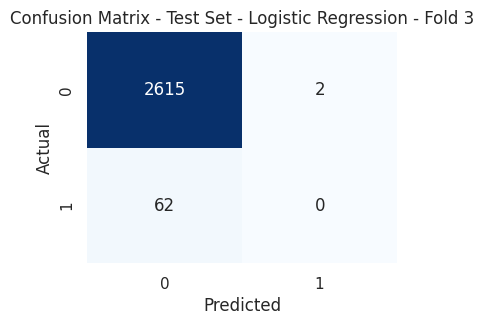

  Model: Logistic Regression
    Train Set Metrics:
      Accuracy: 0.9765
      Precision: 0.2000
      Recall: 0.0054
      F1 Score: 0.0105
      AUC-ROC: 0.5024
    Test Set Metrics:
      Accuracy: 0.9761
      Precision: 0.0000
      Recall: 0.0000
      F1 Score: 0.0000
      AUC-ROC: 0.4996


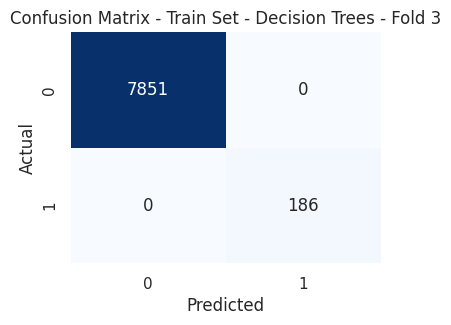

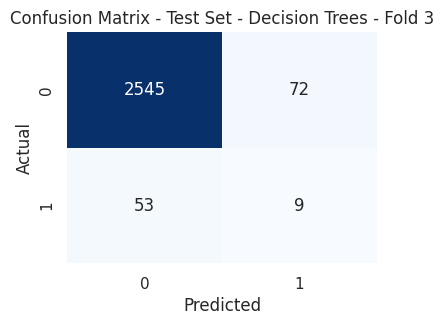

  Model: Decision Trees
    Train Set Metrics:
      Accuracy: 1.0000
      Precision: 1.0000
      Recall: 1.0000
      F1 Score: 1.0000
      AUC-ROC: 1.0000
    Test Set Metrics:
      Accuracy: 0.9533
      Precision: 0.1111
      Recall: 0.1452
      F1 Score: 0.1259
      AUC-ROC: 0.5588


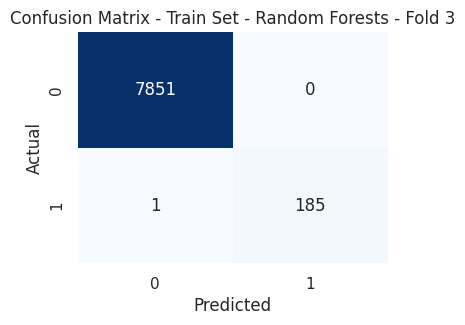

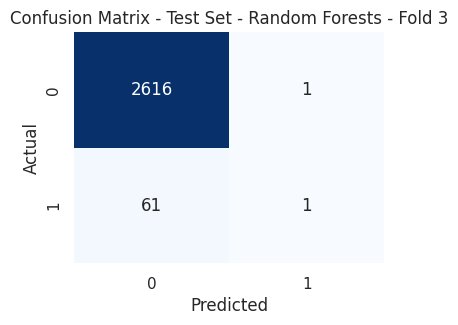

  Model: Random Forests
    Train Set Metrics:
      Accuracy: 0.9999
      Precision: 1.0000
      Recall: 0.9946
      F1 Score: 0.9973
      AUC-ROC: 0.9973
    Test Set Metrics:
      Accuracy: 0.9769
      Precision: 0.5000
      Recall: 0.0161
      F1 Score: 0.0312
      AUC-ROC: 0.5079


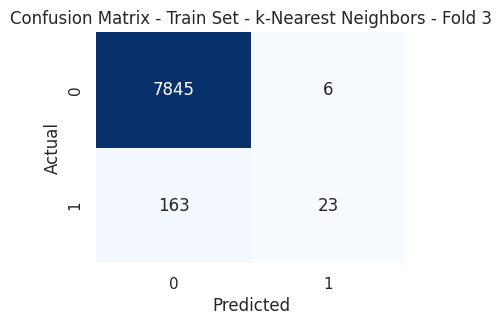

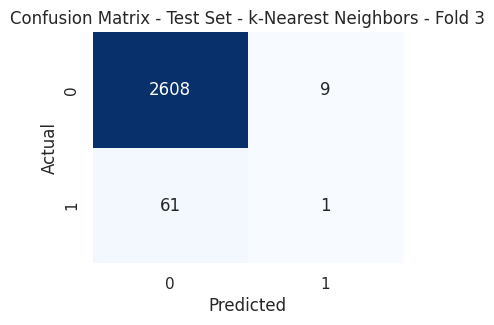

  Model: k-Nearest Neighbors
    Train Set Metrics:
      Accuracy: 0.9790
      Precision: 0.7931
      Recall: 0.1237
      F1 Score: 0.2140
      AUC-ROC: 0.5614
    Test Set Metrics:
      Accuracy: 0.9739
      Precision: 0.1000
      Recall: 0.0161
      F1 Score: 0.0278
      AUC-ROC: 0.5063


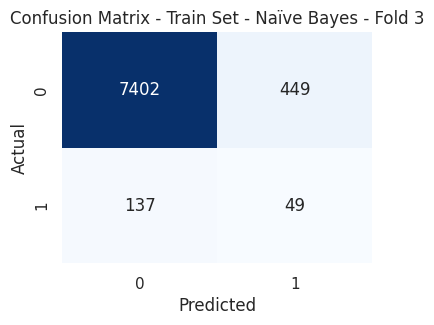

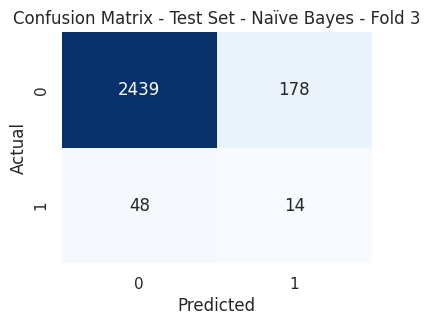

  Model: Naïve Bayes
    Train Set Metrics:
      Accuracy: 0.9271
      Precision: 0.0984
      Recall: 0.2634
      F1 Score: 0.1433
      AUC-ROC: 0.6031
    Test Set Metrics:
      Accuracy: 0.9156
      Precision: 0.0729
      Recall: 0.2258
      F1 Score: 0.1102
      AUC-ROC: 0.5789


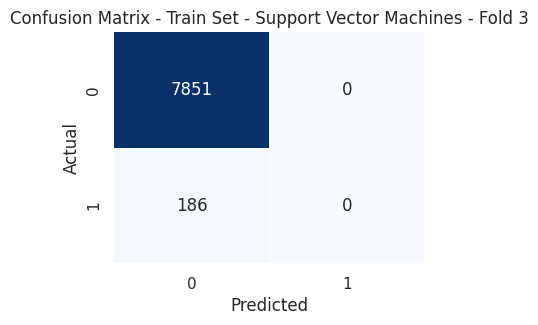

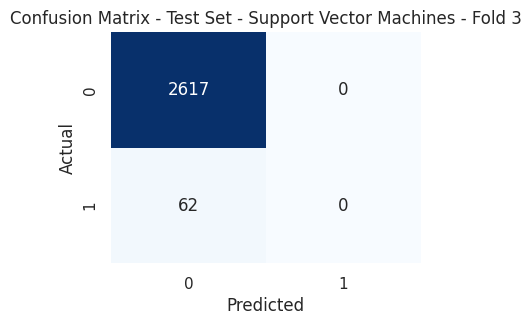

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Model: Support Vector Machines
    Train Set Metrics:
      Accuracy: 0.9769
      Precision: 0.0000
      Recall: 0.0000
      F1 Score: 0.0000
      AUC-ROC: 0.5000
    Test Set Metrics:
      Accuracy: 0.9769
      Precision: 0.0000
      Recall: 0.0000
      F1 Score: 0.0000
      AUC-ROC: 0.5000


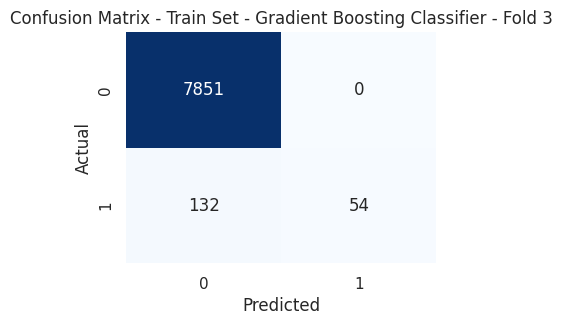

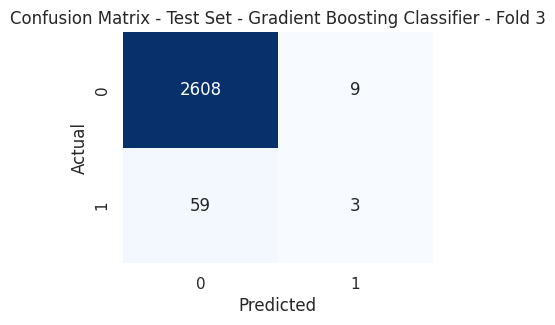

  Model: Gradient Boosting Classifier
    Train Set Metrics:
      Accuracy: 0.9836
      Precision: 1.0000
      Recall: 0.2903
      F1 Score: 0.4500
      AUC-ROC: 0.6452
    Test Set Metrics:
      Accuracy: 0.9746
      Precision: 0.2500
      Recall: 0.0484
      F1 Score: 0.0811
      AUC-ROC: 0.5225

Fold 4:
Train Set 8037 samples- χρεωκοπημένες: 186, υγιείς εταιρείες: 7851
         X1        X2        X3        X4        X5        X6        X7  \
0  0.675945  0.556137  0.192526  0.192989  0.473222  0.318549  0.409274   
1  0.374377  0.636057  0.078877  0.282999  0.279931  0.395393  0.005969   
2  0.551084  0.554176  0.467810  0.314916  0.292182  0.329722  0.021471   
3  0.328492  0.723895  0.002904  0.269259  0.345424  0.409265  0.000914   
4  0.066540  0.708216  0.000866  0.659892  0.098790  0.152183  0.039296   

         X8   X9  X10  X11  ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)  
0  0.102743  0.0  1.0  0.0                              0  
1  0.401406  1.0  1.0  1.0                  

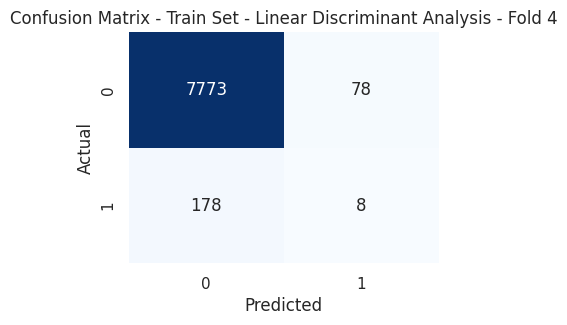

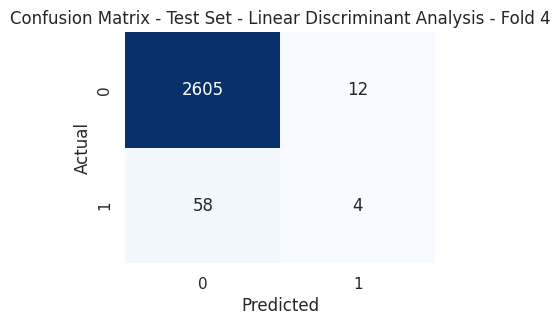

  Model: Linear Discriminant Analysis
    Train Set Metrics:
      Accuracy: 0.9681
      Precision: 0.0930
      Recall: 0.0430
      F1 Score: 0.0588
      AUC-ROC: 0.5165
    Test Set Metrics:
      Accuracy: 0.9739
      Precision: 0.2500
      Recall: 0.0645
      F1 Score: 0.1026
      AUC-ROC: 0.5300


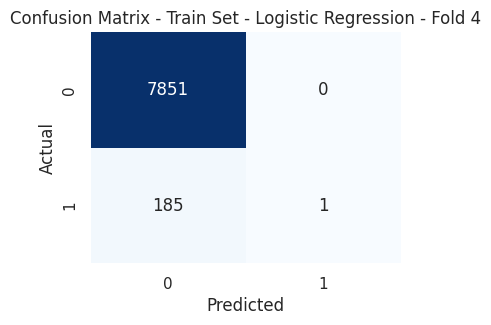

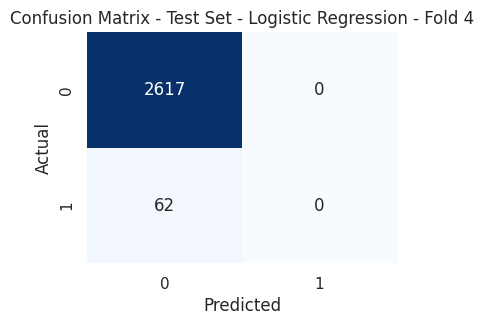

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Model: Logistic Regression
    Train Set Metrics:
      Accuracy: 0.9770
      Precision: 1.0000
      Recall: 0.0054
      F1 Score: 0.0107
      AUC-ROC: 0.5027
    Test Set Metrics:
      Accuracy: 0.9769
      Precision: 0.0000
      Recall: 0.0000
      F1 Score: 0.0000
      AUC-ROC: 0.5000


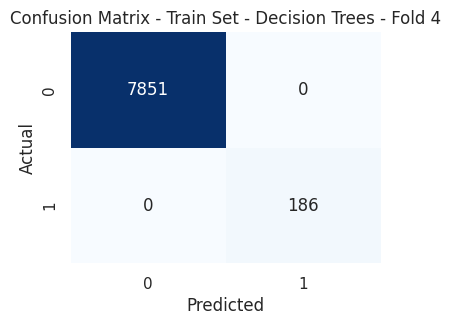

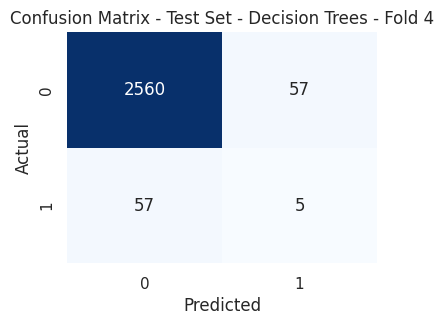

  Model: Decision Trees
    Train Set Metrics:
      Accuracy: 1.0000
      Precision: 1.0000
      Recall: 1.0000
      F1 Score: 1.0000
      AUC-ROC: 1.0000
    Test Set Metrics:
      Accuracy: 0.9574
      Precision: 0.0806
      Recall: 0.0806
      F1 Score: 0.0806
      AUC-ROC: 0.5294


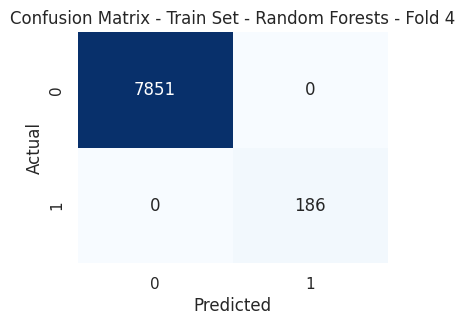

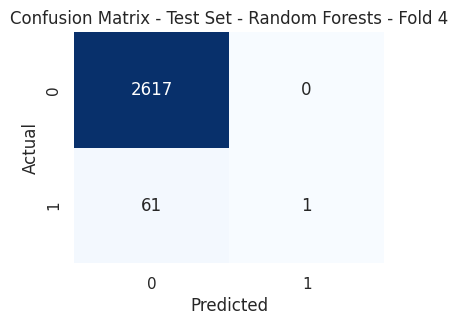

  Model: Random Forests
    Train Set Metrics:
      Accuracy: 1.0000
      Precision: 1.0000
      Recall: 1.0000
      F1 Score: 1.0000
      AUC-ROC: 1.0000
    Test Set Metrics:
      Accuracy: 0.9772
      Precision: 1.0000
      Recall: 0.0161
      F1 Score: 0.0317
      AUC-ROC: 0.5081


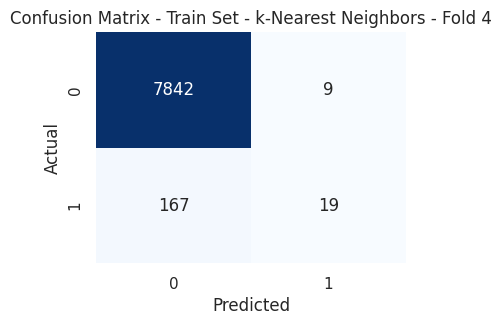

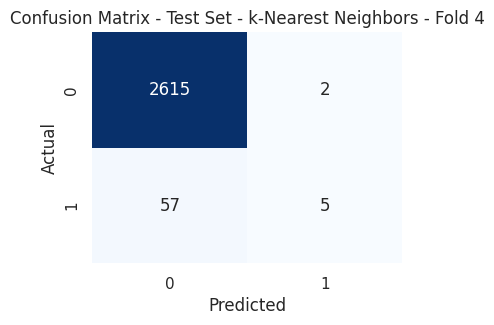

  Model: k-Nearest Neighbors
    Train Set Metrics:
      Accuracy: 0.9781
      Precision: 0.6786
      Recall: 0.1022
      F1 Score: 0.1776
      AUC-ROC: 0.5505
    Test Set Metrics:
      Accuracy: 0.9780
      Precision: 0.7143
      Recall: 0.0806
      F1 Score: 0.1449
      AUC-ROC: 0.5399


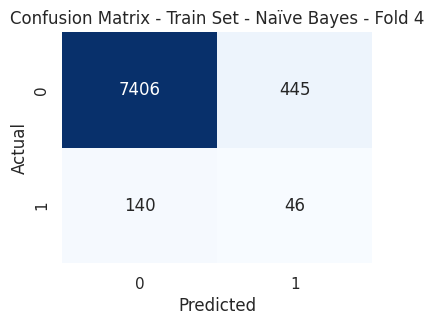

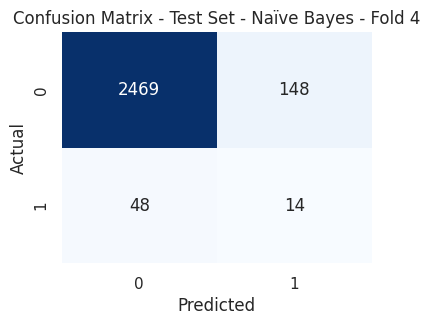

  Model: Naïve Bayes
    Train Set Metrics:
      Accuracy: 0.9272
      Precision: 0.0937
      Recall: 0.2473
      F1 Score: 0.1359
      AUC-ROC: 0.5953
    Test Set Metrics:
      Accuracy: 0.9268
      Precision: 0.0864
      Recall: 0.2258
      F1 Score: 0.1250
      AUC-ROC: 0.5846


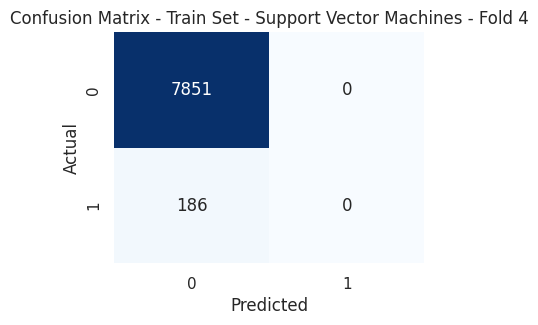

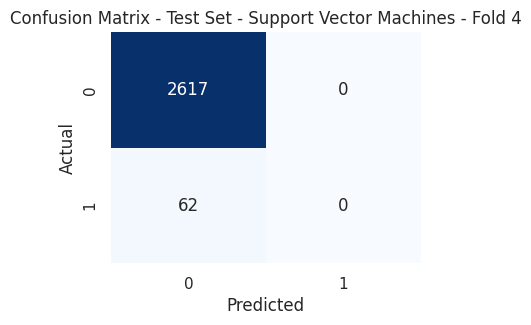

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Model: Support Vector Machines
    Train Set Metrics:
      Accuracy: 0.9769
      Precision: 0.0000
      Recall: 0.0000
      F1 Score: 0.0000
      AUC-ROC: 0.5000
    Test Set Metrics:
      Accuracy: 0.9769
      Precision: 0.0000
      Recall: 0.0000
      F1 Score: 0.0000
      AUC-ROC: 0.5000


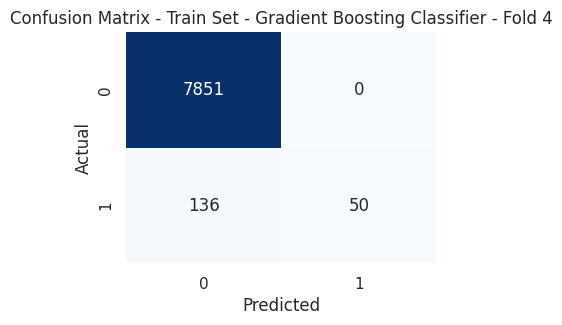

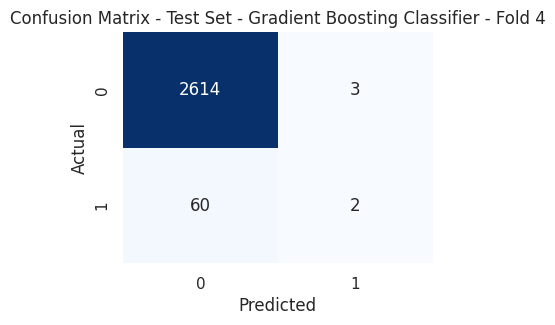

  Model: Gradient Boosting Classifier
    Train Set Metrics:
      Accuracy: 0.9831
      Precision: 1.0000
      Recall: 0.2688
      F1 Score: 0.4237
      AUC-ROC: 0.6344
    Test Set Metrics:
      Accuracy: 0.9765
      Precision: 0.4000
      Recall: 0.0323
      F1 Score: 0.0597
      AUC-ROC: 0.5156


In [10]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

# the target variable is at index 11
target_variable_index = 11

# Extract features and target variable
X = df_normalized.drop(columns=df_normalized.columns[target_variable_index])
y = df_normalized[df_normalized.columns[target_variable_index]]

# Initialize a list of models
models = [
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Trees', DecisionTreeClassifier(random_state=42)),
    ('Random Forests', RandomForestClassifier(random_state=42)),
    ('k-Nearest Neighbors', KNeighborsClassifier()),
    ('Naïve Bayes', GaussianNB()),
    ('Support Vector Machines', SVC(random_state=42)),
    ('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=42))
]


# Initialize StratifiedKFold with 4 folds
stratified_kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Iterate through the folds
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X, y)):

    train_set = df_normalized.iloc[train_index]
    test_set = df_normalized.iloc[test_index]

    print(f"\nFold {fold + 1}:")
    # Train set
    train_counts = train_set[df_normalized.columns[target_variable_index]].value_counts()
    print(f"Train Set {len(train_index)} samples- χρεωκοπημένες: {train_counts[1]}, υγιείς εταιρείες: {train_counts[0]}")
    print(train_set.head())  # Display the first few rows of the train set


    # Test set
    test_counts = test_set[df_normalized.columns[target_variable_index]].value_counts()
    print(f"Test Set {len(test_index)} samples - χρεωκοπημένες: {test_counts[1]}, υγιείς εταιρείες: {test_counts[0]}")
    print(test_set.head())  # Display the first few rows of the test set


    print(f"\nFold {fold + 1}:")
    # Iterate through the models
    for model_name, model in models:
        # Create train and test sets for this fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Predict on the train and test data
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Confusion Matrix for Train Set
        cm_train = confusion_matrix(y_train, y_train_pred)
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['0', '1'],
                    yticklabels=['0', '1'])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f'Confusion Matrix - Train Set - {model_name} - Fold {fold + 1}')
        plt.show()

        # Confusion Matrix for Test Set
        cm_test = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['0', '1'],
                    yticklabels=['0', '1'])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f'Confusion Matrix - Test Set - {model_name} - Fold {fold + 1}')
        plt.show()


        # Evaluate the model on the training set
        accuracy_train = accuracy_score(y_train, y_train_pred)
        precision_train = precision_score(y_train, y_train_pred)
        recall_train = recall_score(y_train, y_train_pred)
        f1_train = f1_score(y_train, y_train_pred)
        roc_auc_train = roc_auc_score(y_train, y_train_pred)

        # Evaluate the model on the test set
        accuracy_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred)
        recall_test = recall_score(y_test, y_test_pred)
        f1_test = f1_score(y_test, y_test_pred)
        roc_auc_test = roc_auc_score(y_test, y_test_pred)

        # Print metrics for this model and fold
        print(f"  Model: {model_name}")
        print(f"    Train Set Metrics:")
        print(f"      Accuracy: {accuracy_train:.4f}")
        print(f"      Precision: {precision_train:.4f}")
        print(f"      Recall: {recall_train:.4f}")
        print(f"      F1 Score: {f1_train:.4f}")
        print(f"      AUC-ROC: {roc_auc_train:.4f}")

        print(f"    Test Set Metrics:")
        print(f"      Accuracy: {accuracy_test:.4f}")
        print(f"      Precision: {precision_test:.4f}")
        print(f"      Recall: {recall_test:.4f}")
        print(f"      F1 Score: {f1_test:.4f}")
        print(f"      AUC-ROC: {roc_auc_test:.4f}")

In [ ]:
# Create a list to store DataFrames for each fold and model
dfs = []

# Iterate through the folds starting from 1
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), start=1):
    # Iterate through the models
    for model_name, model in models:
        # Create train and test sets for this fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Predict on the train and test data
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate metrics
        cm_train = confusion_matrix(y_train, y_train_pred)
        cm_test = confusion_matrix(y_test, y_test_pred)

        # Create DataFrames for training and test outcomes
        train_outcomes = pd.DataFrame({
            'Fold': fold,
            'Classifier Name': model_name,
            'Training or Test Set': 'Training',
            'Balanced or Unbalanced Train Set': 'Unbalanced',
            'Number of Training Samples': len(y_train),
            'Number of Non-Healthy Companies in Training Sample': sum(y_train == 1),
            'True Positives (TP)': cm_train[1, 1],
            'True Negatives (TN)': cm_train[0, 0],
            'False Positives (FP)': cm_train[0, 1],
            'False Negatives (FN)': cm_train[1, 0],
            'ROC-AUC': roc_auc_score(y_train, y_train_pred)
        }, index=[0])

        test_outcomes = pd.DataFrame({
            'Fold': fold,
            'Classifier Name': model_name,
            'Training or Test Set': 'Test',
            'Balanced or Unbalanced Train Set': 'Unbalanced',
            'Number of Training Samples': len(y_test),
            'Number of Non-Healthy Companies in Training Sample': sum(y_test == 1),
            'True Positives (TP)': cm_test[1, 1],
            'True Negatives (TN)': cm_test[0, 0],
            'False Positives (FP)': cm_test[0, 1],
            'False Negatives (FN)': cm_test[1, 0],
            'ROC-AUC': roc_auc_score(y_test, y_test_pred)
        }, index=[0])

        # Append DataFrames to the list
        dfs.append(train_outcomes)
        dfs.append(test_outcomes)

# Concatenate all DataFrames in the list
outcomes_df = pd.concat(dfs, ignore_index=True)

# Save the DataFrame to a CSV file
outcomes_df.to_csv('/content/drive/MyDrive/Colab Notebooks/unbalancedDataOutcomes.csv', index=False)
